# Factor Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#  Load cleaned data
df = pd.read_parquet("../cleanData/merged_data.parquet")

In [4]:
#  Keep numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [5]:
#  Scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

In [6]:
#  Apply Factor Analysis (choose n_components = 3 for example)
fa = FactorAnalysis(n_components=3, random_state=42)
factors = fa.fit_transform(scaled)

In [8]:
# factor scores
factor_scores = pd.DataFrame(factors, columns=['Factor1', 'Factor2', 'Factor3'])

In [11]:
# head of scores
factor_scores.head()

,Factor1,Factor2,Factor3
0,-1.596169,-1.314288,0.726445
1,-0.415276,-1.124476,2.051753
2,-2.035894,0.383158,0.336469
3,-0.350460,-0.718783,2.144569
4,-0.329552,-0.243496,2.195856


In [10]:
# factor loadings
loadings = pd.DataFrame(fa.components_.T,
                        columns=['Factor1', 'Factor2', 'Factor3'],
                        index=numeric_df.columns)

In [12]:
# Sort loadings for each factor
for i in range(1, 4):
    print(f"\nTop variables for Factor{i}:\n")
    display(loadings[f"Factor{i}"].sort_values(ascending=False))



Top variables for Factor1:



,Factor1
weather_id_x,0.743343
weather_id_y,0.743343
visibility_m_y,0.018221
visibility_m_x,0.018221
humidity_y,0.003869
humidity_x,0.003869
wind_speed_kmh_x,-0.008136
wind_speed_kmh_y,-0.008136
rain_mm_y,-0.030518
rain_mm_x,-0.030518



Top variables for Factor2:



,Factor2
air_pressure_hpa_y,0.620067
air_pressure_hpa_x,0.620067
weather_id_x,0.040800
weather_id_y,0.040800
humidity_y,0.011205
humidity_x,0.011205
visibility_m_y,0.006743
visibility_m_x,0.006743
wind_speed_kmh_x,-0.030995
wind_speed_kmh_y,-0.030995



Top variables for Factor3:



,Factor3
rain_mm_x,0.034681
rain_mm_y,0.034681
humidity_y,0.024182
humidity_x,0.024182
visibility_m_x,0.017318
visibility_m_y,0.017318
wind_speed_kmh_x,0.006722
wind_speed_kmh_y,0.006722
temperature_c_x,-0.471916
temperature_c_y,-0.471916


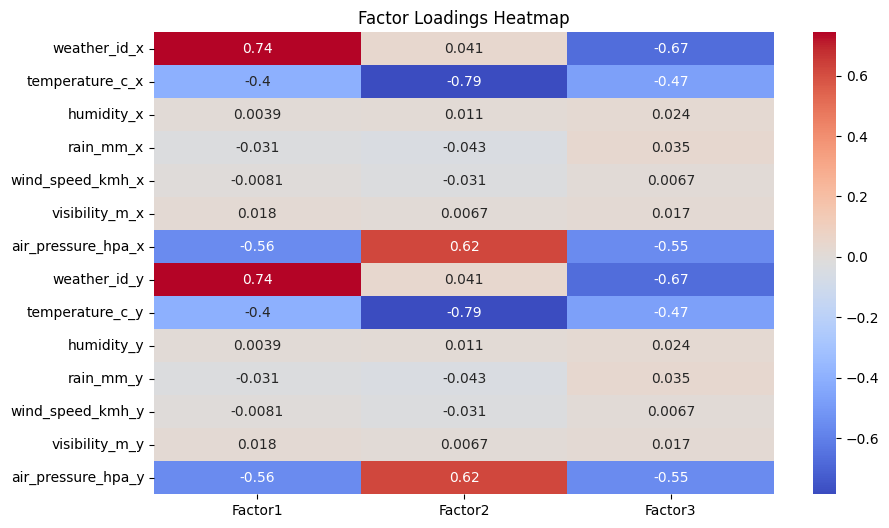

In [13]:
# Plot heatmap of loadings
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap="coolwarm")
plt.title("Factor Loadings Heatmap")
plt.show()

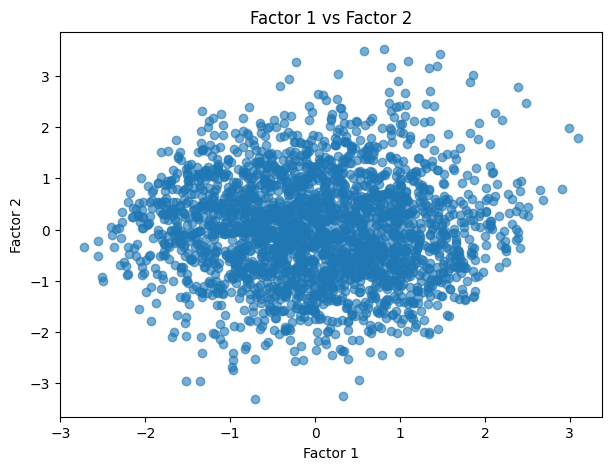

In [14]:
# Plot factor scores for visual interpretation
plt.figure(figsize=(7,5))
plt.scatter(factor_scores["Factor1"], factor_scores["Factor2"], alpha=0.6)
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor 1 vs Factor 2")
plt.show()

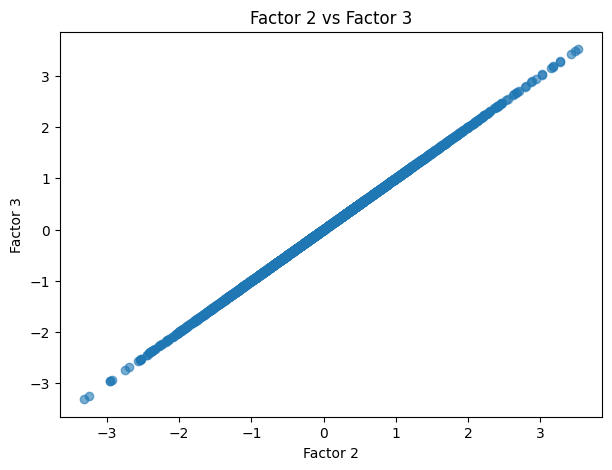

In [15]:
# Plot factor scores for visual interpretation
plt.figure(figsize=(7,5))
plt.scatter(factor_scores["Factor2"], factor_scores["Factor2"], alpha=0.6)
plt.xlabel("Factor 2")
plt.ylabel("Factor 3")
plt.title("Factor 2 vs Factor 3")
plt.show()

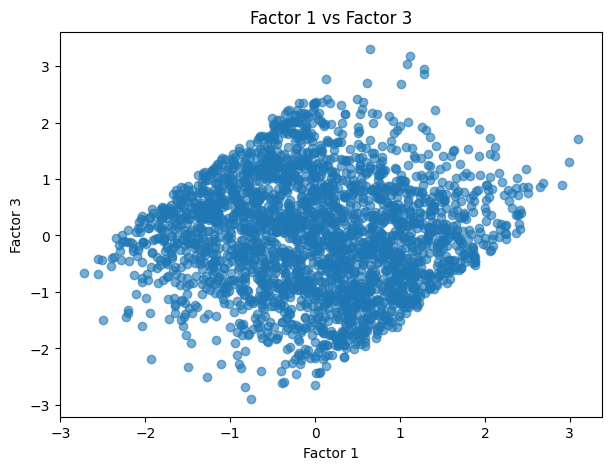

In [16]:
# Plot factor scores for visual interpretation
plt.figure(figsize=(7,5))
plt.scatter(factor_scores["Factor1"], factor_scores["Factor3"], alpha=0.6)
plt.xlabel("Factor 1")
plt.ylabel("Factor 3")
plt.title("Factor 1 vs Factor 3")
plt.show()

In [ ]:
# save the results
factor_scores.to_parquet("../gold/factor_analysis_scores.parquet")
loadings.to_parquet("../gold/factor_analysis_loadings.parquet")